In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


In [ ]:
train = pd.read_csv('../data/train_ver2.csv')

## 신규 구매 변수 생성

In [ ]:
prods = [col for col in train.columns if 'ult1' in col]


In [ ]:
# 날짜 -> 정수 변환
def date_to_int(str_date):
    y, m, d = [int(d) for d in str_date.strip().split('-')]
    int_date = (y - 2015) * 12 + m
    return int_date

train['int_date'] = train['fecha_dato'].map(date_to_int).astype(np.int8)


In [ ]:
# lag 데이터 (1달전 값) 생성
train_lag = train.copy(deep=True)
train_lag['int_date'] += 1
train_lag.columns = [x+'_prev' if x not in ['ncodpers', 'int_date'] else x for x in train_lag.columns]

In [ ]:
# 원본 + lag 데이터 병합
train_df = train.merge(train_lag, on=['ncodpers', 'int_date'], how='left')

del train, train_lag

In [ ]:
# 결측치 처리
for prod in prods:
    prev = prod+ '_prev'
    train_df[prev].fillna(0, inplace=True)

In [ ]:
# 신규 제품 가입 변수 생성 (이전달 0, 이번달 1)
for prod in prods:
    prod_add = prod + '_add'
    prod_prev = prod + '_prev'
    train_df[prod_add] = ((train_df[prod]==1) & (train_df[prod_prev]==0)).astype(np.int8)

In [ ]:
train_df.tail(10)

## 시각화 확인


In [ ]:
prod_labels = [col+'_add' for col in prods]
label_data = train_df.loc[:, ['fecha_dato']+prod_labels]

months = np.unique(label_data['fecha_dato']).tolist()

label_over_time = []

for i, prod in enumerate(prod_labels):
    temp = label_data.groupby(['fecha_dato'])[prod].agg('sum').tolist()
    label_over_time.append(temp)



In [ ]:
# 월별 각 변수의 비율
label_sum_over_time = []
for i, prod in enumerate(prod_labels):
    temp = (label_over_time[i]/np.asarray(label_over_time).sum(axis=0))*100
    label_sum_over_time.append(temp)


In [ ]:

label_sum_over_time = []
for i, prod in enumerate(prod_labels):
    temp = np.asarray(label_over_time[i:]).sum(axis=0)
    label_sum_over_time.append(temp)
    
label_sum_percent = (label_sum_over_time / (np.asarray(label_sum_over_time).max(axis=0)))*100

In [ ]:
color_list = sns.color_palette("icefire", 24)


f,ax = plt.subplots(figsize=(30, 15))
for i, prod in enumerate(prod_labels):
    # x : 월 / y: 누적 총합
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i], alpha=0.7 )
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i], 
                         edgecolor='none') for i in range(len(prods))],
           prods, loc=1, ncol=2, prop={'size':15})

- ind_cco_fin_ult1(당좌예금)은 7,8월 높은 값을 가짐
- ind_nomina_ult1, ind_nom_pens_ult1(급여, 연금)은 겨울로 갈수록 증가, 여름에 가장 낮은 값을 가짐
- 신규 구매 빈도가 높은 것 : ind_cco_fin_ult1 당좌예금, int_tjcr_fin_ult1 신용카드, int_nomina_ult1 급여, int_nom_pens_ult1연금, ind_recibo_fin_ult1직불카드
-> 계절에 따라 다수 모델링 가능성도 열어놔야 함

In [6]:
prods = [col for col in train.columns if 'ult1' in col]


In [9]:
# 날짜 -> 정수 변환
def date_to_int(str_date):
    y, m, d = [int(d) for d in str_date.strip().split('-')]
    int_date = (y - 2015) * 12 + m
    return int_date

train['int_date'] = train['fecha_dato'].map(date_to_int).astype(np.int8)


In [10]:
# lag 데이터 (1달전 값) 생성
train_lag = train.copy(deep=True)
train_lag['int_date'] += 1
train_lag.columns = [x+'_prev' if x not in ['ncodpers', 'int_date'] else x for x in train_lag.columns]

In [11]:
# 원본 + lag 데이터 병합
train_df = train.merge(train_lag, on=['ncodpers', 'int_date'], how='left')

del train, train_lag

In [14]:
# 결측치 처리
for prod in prods:
    prev = prod+ '_prev'
    train_df[prev].fillna(0, inplace=True)

In [15]:
# 신규 제품 가입 변수 생성 (이전달 0, 이번달 1)
for prod in prods:
    prod_add = prod + '_add'
    prod_prev = prod + '_prev'
    train_df[prod_add] = ((train_df[prod]==1) & (train_df[prod_prev]==0)).astype(np.int8)

In [16]:
train_df.tail(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1_add,ind_plan_fin_ult1_add,ind_pres_fin_ult1_add,ind_reca_fin_ult1_add,ind_tjcr_fin_ult1_add,ind_valo_fin_ult1_add,ind_viv_fin_ult1_add,ind_nomina_ult1_add,ind_nom_pens_ult1_add,ind_recibo_ult1_add
13647299,2016-05-28,1166770,N,ES,H,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647300,2016-05-28,1166769,N,ES,H,26,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647301,2016-05-28,1166768,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647302,2016-05-28,1166767,N,ES,V,25,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647303,2016-05-28,1166766,N,ES,V,25,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647308,2016-05-28,1550586,N,ES,H,37,2016-05-13,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


## 시각화 확인


In [30]:
prod_labels = [col+'_add' for col in prods]
label_data = train_df.loc[:, ['fecha_dato']+prod_labels]

months = np.unique(label_data['fecha_dato']).tolist()

label_over_time = []

for i, prod in enumerate(prod_labels):
    temp = label_data.groupby(['fecha_dato'])[prod].agg('sum').tolist()
    label_over_time.append(temp)



In [31]:
# 월별 각 변수의 비율
label_sum_over_time = []
for i, prod in enumerate(prod_labels):
    temp = (label_over_time[i]/np.asarray(label_over_time).sum(axis=0))*100
    label_sum_over_time.append(temp)


In [32]:

label_sum_over_time = []
for i, prod in enumerate(prod_labels):
    temp = np.asarray(label_over_time[i:]).sum(axis=0)
    label_sum_over_time.append(temp)
    
label_sum_percent = (label_sum_over_time / (np.asarray(label_sum_over_time).max(axis=0)))*100

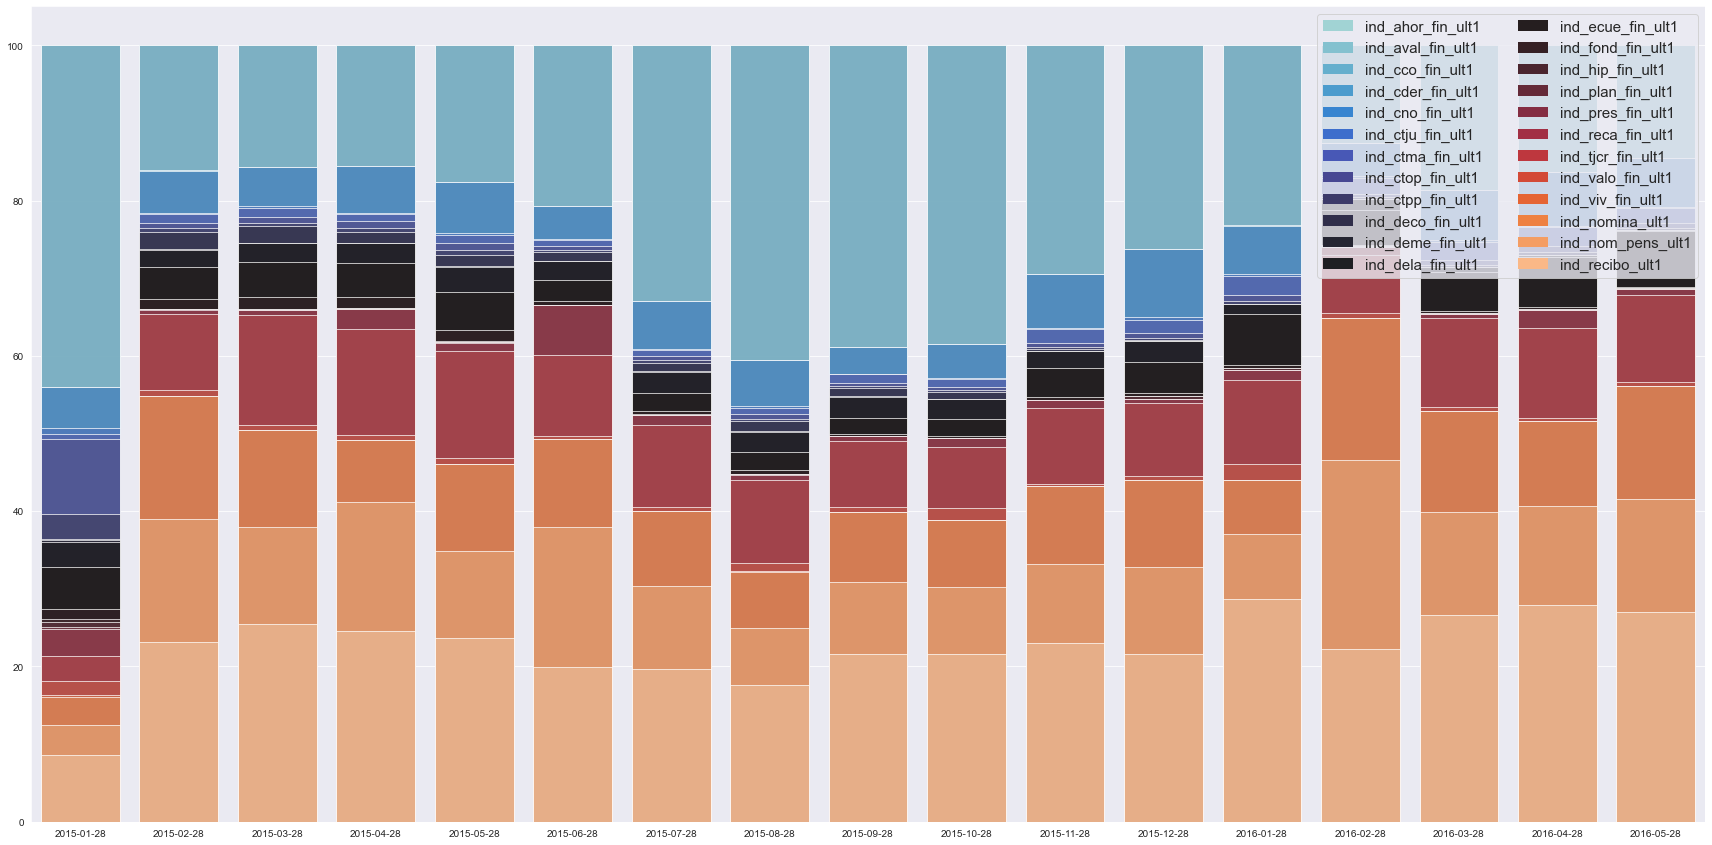

In [33]:
color_list = sns.color_palette("icefire", 24)


f,ax = plt.subplots(figsize=(30, 15))
for i, prod in enumerate(prod_labels):
    # x : 월 / y: 누적 총합
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i], alpha=0.7 )
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i], 
                         edgecolor='none') for i in range(len(prods))],
           prods, loc=1, ncol=2, prop={'size':15})

- ind_cco_fin_ult1(당좌예금)은 7,8월 높은 값을 가짐
- ind_nomina_ult1, ind_nom_pens_ult1(급여, 연금)은 겨울로 갈수록 증가, 여름에 가장 낮은 값을 가짐
- 신규 구매 빈도가 높은 것 : ind_cco_fin_ult1 당좌예금, int_tjcr_fin_ult1 신용카드, int_nomina_ult1 급여, int_nom_pens_ult1연금, ind_recibo_fin_ult1직불카드
-> 계절에 따라 다수 모델링 가능성도 열어놔야 함